# Students Performance in Exams


![](https://cms.qz.com/wp-content/uploads/2016/04/qz_education.jpg?quality=75&strip=all&w=1600&h=900)

This dataset comes from [Kaggle's Dataset - Students PErformance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams). This data set consists of the marks secured by the students in various subjects.

Data source: http://roycekimmons.com/tools/generated_data/exams

In [35]:
# Python Data Analysis Imports
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# statistical methods
from scipy import stats

In [36]:
education = pd.read_csv("./StudentsPerformance.csv")
education.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
education.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


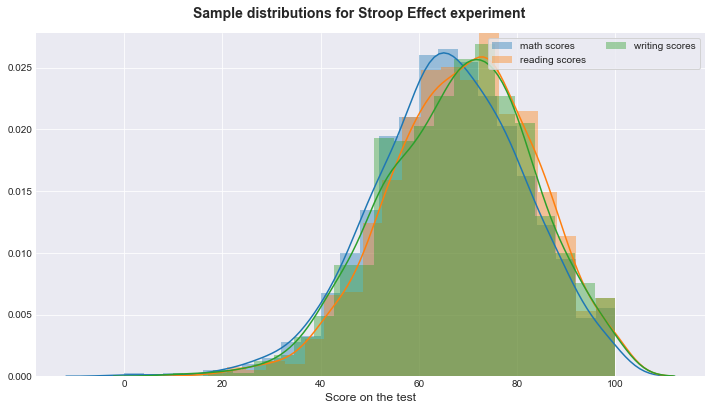

In [38]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Sample distributions for Stroop Effect experiment', fontsize=14, fontweight='bold')
sns.distplot(education['math score'], label = 'math scores', ax = ax)
sns.distplot(education['reading score'], label = 'reading scores', ax = ax)
sns.distplot(education['writing score'], label = 'writing scores', ax = ax)

ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set_xlabel('Score on the test', fontsize=12)
plt.show()

create new column in the education deataframe that shows the mean of all the other columns related to the test scores

## Testing Types

Our objective is to test and validate a set of statistica type test. There are several techniques that we will use to perform this test, which include the following:
- __One Sample:__ Z-test or t-test
- __Two Samples:__ T-test (independent or paired)
- __ Three Samples:__ One-way ANOVA F-Test
- __Factorial design:__ Two-way ANOVA F-test

In [39]:
education['average_score'] = education[['math score', 
                                        'reading score', 'writing score']].mean(axis=1)

#### Significance Level (95%)
Throughout all of the following statistical inference test, we will use a a significance threashold of the standard 5% (0.05) that provides us a 95% confidence level in our result. 

In [40]:
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

### Hypthesis 1 - Preparation is Key

For preparation we will the `test preparation course` column in the education data set and there are two variable that we will test upon as our independent variables: `none` and `completed`. We are testing to see for those students whom `completed` the test preparation course did they on average perform better than those students whom did not `none` complete the preparation. 

__Problem Statement:__ For the first test, we would like to know if kids that prepared on average performed better on the exam. 

__Stated Hypothesis:__
$Ho = μ_1 = μ_2$

$H_a:μ_1 ≠ μ_2$


In [8]:
education['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

### Check Assumptions
To ensure that the t test can be conducted, we have to first validate the t-test assumptions, which include:
1. Normality - samples are normally distributed
2. Equal Variances _(Homogeneity of variance)_ - there is equal variance in the population
3. Independent Observations - the observations are independent from each other

Just want to give a quick shoutout and thank [machine learning mastery](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) for pointing me in the right direction to assist with the python analysis. 

#### Normality
When we are looking at normality we are mainly focused on looking at the distribution of the dependent variables _(in this case are the average test scores)_ for each group and checking for indication of non-normallity or any indicatino of thick tails, heavy skews that may lead us to believe that there are violations in the data that may yield fiarly accurate p-values. 

The easies tway to check normality is visually. We will use two key visualiations the histogram and the QQ plot to check for normality. 

##### Normality Check: Histogram
For the histogram plot we want to evaluate the relationship of the data  to see if it falls in the Gaussian distribution. We will use the `hist()` function from matplotlib, which automatically determins the appropriate bins to apply the plots in.

C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


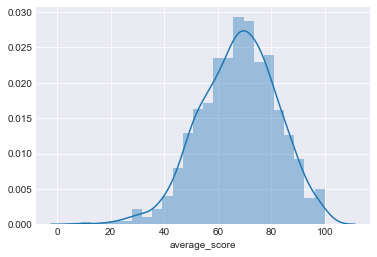

In [41]:
sns.distplot(education.average_score)

As we can see from the plot, it does not look completely normal, as there appears to be a slight tail to the left indicating a negative skew or skewed left. 

#### QQ Plot Normality Check

Next we will use the second method of visualizing the data for evaluations of normality with the quantile-quantile plot, Q-Q plot. The QQ plot generates an idealized distributino with a linear line indicating the Gaussian distribtion. The resulting observations are plotted on a scatter plot with the `theoretical qualtiles` or idealiezed values on the x-axis and the `sample qualtiles` or the sample data on the y-axis. 

To evaluate the plot for normality, the best case scenario will be all observations plotted would be on the linear line. We will note deviations from the distribution of normality when the observations are not on the linear line. 

To perfomre the QQ plot, we will use the `qqplot()` function from `statemodels API`

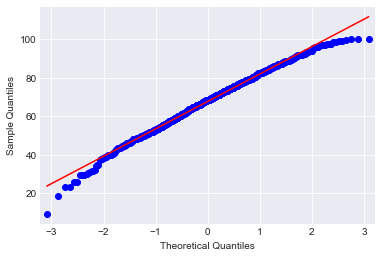

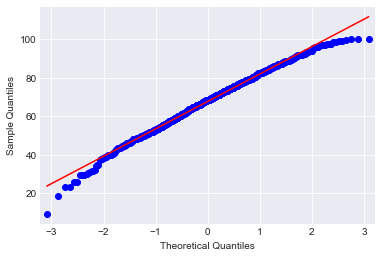

In [45]:
# qq plot
from statsmodels.graphics.gofplots import qqplot
qqplot(education.average_score, line='s')

##### Shapiro Test

To suppliment the analysis of normality, we can use the __Shapiro Test__ to calculate whether a randome sample of data comes from a normal distribution. When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal. If this test fails you can state with 95% confidence that your data does not fit in the normal distribution.

For additional details on the Shapiro Test you can find the documentation here: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html

Once we run the test, if the p-value is less than our level of significance (0.05 for a 95% confidence interva), we can suggest that the data is normally distributed, and therefore reject the null hypotehisis. In other words if the p-value is < (less) than 0.05 we can assume the data is not normally distributed and if the p-value is > 0.05, the data is normally distributed. 

In [34]:
# normality test using the Shapiro Test
stat, p = stats.shapiro(education['average_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

interpret(p)

Statistics=0.993, p=0.000
Different distribution (reject H0)


The first value of the Shapiro test result is the shapiro test statistics and the second value is the corresponding p-value. Since the p-value is <.0001, we can __reject the null hypothesis__ incicating we may have to perform a data transformaiton or use a non-parametric tool.

### Other

In [22]:
education.loc[education['gender'] == 'male', 'gender_'] = 1
education.loc[education['gender'] == 'female', 'gender_'] = 0

C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


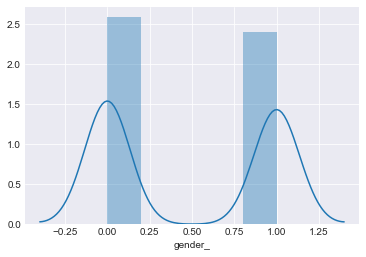

In [26]:
sns.distplot(education['gender_'])